In [1]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas

import copy

# Lab assignment 4: Doing GIS with `geopandas`

## Grab the data
Three datasets are provided:

+ census population counts for Wellington City from the 2013 Census. These were obtained from [koordinates.com](https://koordinates.com) and from [stats.govt.nz](https://stats.govt.nz)
+ New Zealand road centrelines assembled by [LINZ](https://linz.govt.nz) and served by [koordinates.com](https://koordinates.com)
+ traffic accident data from [NZ Transport Agency](https://nzta.govt.nz/safety/safety-resources/road-safety-information-and-tools/disaggregated-crash-data/)

It is worth pointing out that I did the necessary tidying of raw datasets entirely in `geopandas` to reduce these down to the Wellington City area only, and in the case of the accidents data to focus on 2017 only!

Anyway, here they all are:

In [149]:
pop = geopandas.read_file('data/wgtn-2013-pop.geojson')
rds = geopandas.read_file('data/wgtn-roads.shp')
crashes = geopandas.read_file('data/crashes-2017.geojson')

## Take a look at the data
### First a map
Once again, a reminder of making maps in `geopandas`.

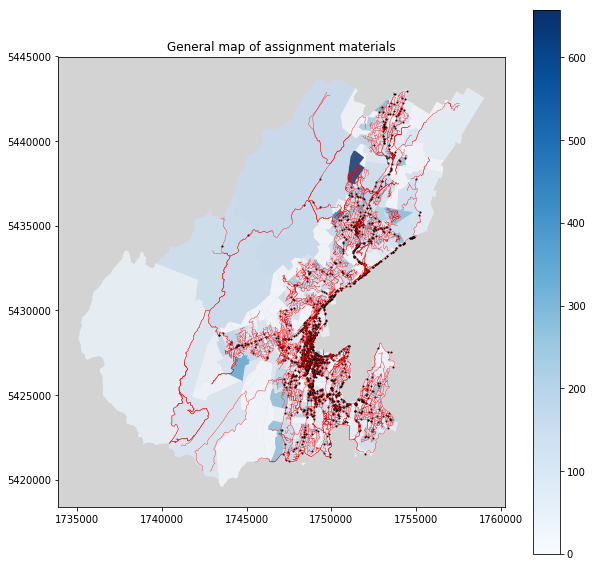

In [128]:
# Make the figure
fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# Set background colour to grey
ax.set_facecolor('lightgrey')
ax.set_title("General map of assignment materials")

# Plot meshblock populations
pop.plot(ax=ax, column='pop2013', cmap='Blues', alpha=0.8, legend=True)
# Add the roads
rds.plot(ax=ax, linewidth=0.35, color='r')
# Add the crashes
crashes.plot(ax=ax, color='k', markersize=1)

### Then tables
Also important to examine the data tables, so that you know variable names and so on.

In [129]:
pop.head()

,OBJECTID,MB2013,AU2013,AU2013_NAM,pop2013,geometry
0,30221,1990400,572600,Tawa Central,57,"POLYGON ((1752715.1272 5440817.1777, 1752870.7..."
1,32856,2171003,576400,Newtown East,45,"POLYGON ((1749094.4798 5424336.6844, 1749100.0..."
2,32521,2142900,573400,Mt Victoria West,9,"POLYGON ((1749173.8509 5426375.5898, 1749190.6..."
3,32015,2104000,574702,Wilton,135,"POLYGON ((1747166.1827 5429976.023, 1747153.03..."
4,32295,2124200,573000,Lambton,3,"POLYGON ((1748753.1824 5428642.3022, 1748818.4..."


In [130]:
rds.head()

,road_secti,length,geometry
0,1325758,11.687530,"LINESTRING (1748050.91672133 5431494.27297632,..."
1,1325784,307.427950,LINESTRING (1751176.549220026 5434024.96273833...
2,1325809,153.915042,LINESTRING (1753310.082238207 5439021.03490052...
3,1325810,157.631564,LINESTRING (1753567.137978687 5438592.38900346...
4,1325811,15.048831,LINESTRING (1753591.558739239 5439033.02053952...


In [131]:
crashes.head()

,CRASH_SEV,FATAL_COUN,SERIOUSINJ,MINORINJ_C,MULTI_VEH,AU_ID,MB_ID,CRASH_LOCN,CRASH_LO_1,geometry
0,F,1,0,0,Vehicle(s)+Pedestrian(s),572600,1990500,MAIN ROAD,ESSEX ST,POINT (1753096 5440813)
1,M,0,0,1,Single vehicle,573522,2086104,NASSAU AVENUE,JAMAICA DRIVE,POINT (1754055 5438847)
2,M,0,0,1,Vehicle(s)+Pedestrian(s),577200,2206200,COBHAM DRIVE,SHELLY BAY ROAD,POINT (1751588 5424742)
3,M,0,0,1,Single vehicle,573700,2082800,Z CARPARK,GOTHIC ST,POINT (1751402 5434774)
4,S,0,1,0,Single vehicle,573000,2126900,THE TERRACE,ALLENBY TERRACE,POINT (1748404 5427737)


## The assignment
This assignment challenges you to perform fairly simple GIS data manipulation using `geopandas`.

The output requested a map of traffic accidents per km of road at Census Area Unit level